In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Getting better insights about the dataset

In [18]:
df = pd.read_csv('combined-dataset.csv')
df.head(5)
df.nunique()
df.shape

(778, 12)

In [19]:
df.info()
df.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   _id     778 non-null    int64  
 1   CT      778 non-null    int64  
 2   BPAD    778 non-null    float64
 3   BPAN    778 non-null    float64
 4   BPAN2   778 non-null    float64
 5   BWAD    778 non-null    float64
 6   BWAN    778 non-null    float64
 7   BWAN2   778 non-null    float64
 8   BMAD    778 non-null    float64
 9   BMAN    778 non-null    float64
 10  BMAN2   778 non-null    float64
 11  year    778 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 73.1 KB


,count,mean,std,min,25%,50%,75%,max
_id,778.0,195.005141,112.375382,1.0,98.00,195.0,292.00,390.0
CT,778.0,393921.943445,161736.715589,10300.0,281400.00,456004.0,496200.00,980700.0
BPAD,778.0,1697.668380,928.058974,5.0,988.75,1491.0,2277.25,6835.0
BPAN,778.0,164.904884,92.776929,0.0,93.00,150.0,219.00,522.0
BPAN2,778.0,104.236504,55.634407,0.0,62.00,97.0,141.00,315.0
BWAD,778.0,926.605398,491.751323,4.0,543.00,822.0,1250.50,3495.0
BWAN,778.0,87.610540,50.222196,0.0,50.00,78.0,117.00,321.0
BWAN2,778.0,53.645244,28.776109,0.0,33.00,49.0,72.00,169.0
BMAD,778.0,771.061697,439.827431,0.0,438.25,673.5,1046.25,3340.0
BMAN,778.0,77.293059,45.020075,0.0,42.00,69.0,106.00,238.0


### Creating a new column which basically represents Total people diagnosed but not treated for bipolar disorder namely 'total_gap'

In [23]:
df['total_gap'] = df['BPAN'] - df['BPAN2']
df['total_gap'].describe()

count    778.000000
mean      60.668380
std       43.342586
min        0.000000
25%       29.000000
50%       48.000000
75%       81.750000
max      240.000000
Name: total_gap, dtype: float64

In [33]:
df.groupby('year')['total_gap'].value_counts().reset_index()

,year,total_gap,count
0,2015.0,43.0,8
1,2015.0,33.0,7
2,2015.0,46.0,7
3,2015.0,29.0,7
4,2015.0,30.0,7
...,...,...,...
251,2016.0,40.0,1
252,2016.0,4.0,1
253,2016.0,2.0,1
254,2016.0,1.0,1


### Calculating the percentage of people who were treated

In [34]:
df['treatment_rate'] = (df['BPAN2']/df['BPAN']) * 100

In [35]:
df['treatment_rate'].describe()

count    775.000000
mean      64.677217
std       10.111606
min       35.087719
25%       57.289855
50%       65.263158
75%       72.024845
max      100.000000
Name: treatment_rate, dtype: float64

### Calculating the Gap for Women

In [36]:
df['female_gap'] = df['BWAN'] - df['BWAN2']

In [37]:
df['female_gap'].describe()

count    778.000000
mean      33.965296
std       26.455617
min        0.000000
25%       15.000000
50%       25.500000
75%       44.000000
max      161.000000
Name: female_gap, dtype: float64

### Calculating the Gap for Men

In [38]:
df['male_gap'] = df['BMAN'] - df['BMAN2']

In [40]:
df['male_gap'].describe()

count    778.000000
mean      26.703085
std       18.412631
min        0.000000
25%       12.000000
50%       23.000000
75%       37.000000
max       84.000000
Name: male_gap, dtype: float64

### Calculating the Female Rate

In [41]:
df['female_rate'] = (df['BWAN2']/df['BWAN']) * 100

In [42]:
df['female_rate'].describe()

count    774.000000
mean      63.169879
std       13.301519
min       14.285714
25%       52.950915
50%       64.031932
75%       73.333333
max      100.000000
Name: female_rate, dtype: float64

### Calculating the Male Rate

In [43]:
df['male_rate'] = (df['BMAN2']/df['BMAN']) * 100

In [44]:
df['male_rate'].describe()

count    775.000000
mean      66.566543
std        9.434996
min       35.000000
25%       60.319473
50%       66.666667
75%       72.264957
max      100.000000
Name: male_rate, dtype: float64

### Calculating the Gender Gap Difference

In [50]:
df['gender_gap_diff'] = df['female_rate'] - df['male_rate']

In [51]:
df['gender_gap_diff'].describe()

count    774.000000
mean      -3.353468
std       11.513387
min      -68.067227
25%      -10.205660
50%       -3.180016
75%        3.654801
max       36.842105
Name: gender_gap_diff, dtype: float64

### Finding out the Treatment Rate performance between years 2015 and 2016

<Axes: title={'center': 'YOY Treatment Rate Metrics Graph'}, xlabel='year', ylabel='Aggregate Metrics'>

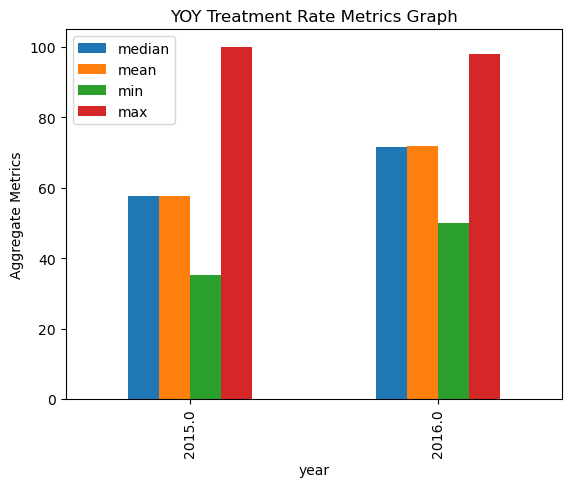

In [73]:
df.groupby('year')['treatment_rate'].agg(['median','mean', 'min', 'max'])
df.groupby('year')['treatment_rate'].agg(['median','mean', 'min', 'max']).plot(kind='bar', ylabel='Aggregate Metrics', title= 'YOY Treatment Rate Metrics Graph')

<Axes: title={'center': 'Median Treatment Rate Bar Graph'}, xlabel='year', ylabel='Median Treatment Rate'>

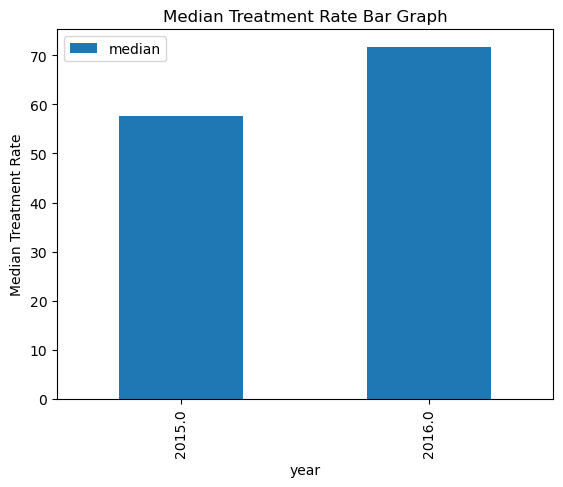

In [72]:
df.groupby('year')['treatment_rate'].agg(['median']).plot(kind='bar', ylabel='Median Treatment Rate', title='Median Treatment Rate Bar Graph')

### So we can undersand from the above conclusion that we the treatment rate of year 2016 if better than the treatment rate of 2015

### Comparing the Male Vs the Female treatment rate in the county

In [85]:
df.groupby('year')[['male_rate','female_rate']].agg(['max','min','mean','median']).transpose()

year                    2015.0      2016.0
male_rate   max     100.000000  100.000000
            min      35.000000   50.000000
            mean     61.788535   71.356896
            median   61.326979   70.895522
female_rate max      90.476190  100.000000
            min      17.647059   14.285714
            mean     53.893608   72.446149
            median   53.521127   73.015873

<Axes: title={'center': 'Gender Wise Median Treatment Rate by Year'}, xlabel='year', ylabel='Median Treatment Rate'>

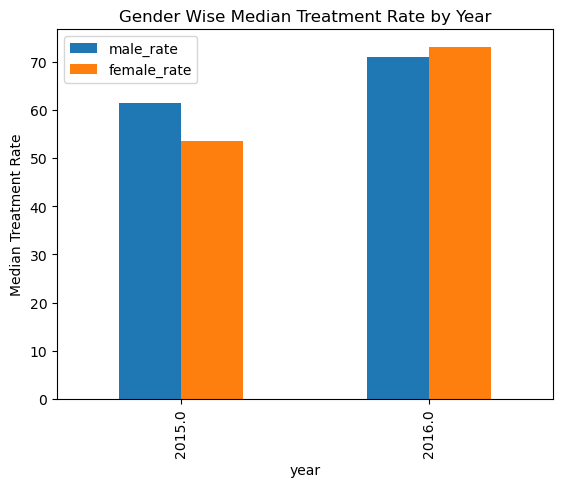

In [79]:
df.groupby('year')[['male_rate','female_rate']].median().plot(kind='bar', ylabel='Median Treatment Rate', title='Gender Wise Median Treatment Rate by Year')

### During the year 2015 the male bipolar disorder identification and treatment level is relatively higher than the female BP identification and treatment level. We can come to a conclusion theat there is a clear disparity and as we come to the year 2016 we can observe the treatment and medication of female Bipolar disoder patients has been increased and take over the male identification by a very slight margin.